# Introducción a Keras: Implementando una RNA para clasificación

Notebook base por: Santiago Hernández

## Pasos en la implementación de una Red Neuronal Artificial en Keras

1. Define tu conjunto de datos de entrenamiento: vectores de entrada y de salida
2. Define la arquitectura de la Red Neuronal Artificial
3. Configura el proceso de aprendizaje mediante la seleccion de una funcion de error, una funcion de optimizacion y diferentes metricas para monitorizar el proceso
4. Entrena la RNA con tu conjunto de datos de entrenamiento mediante el uso del metodo **_fit()_**

## 0. Imports

Lo primero que debe hacerse es importar las librerías específicas necesarias para la implementación de la Red Neuronal Artificial. En las nuevas versiones de Tensorflow y Keras, la recomendación es utilizar keras a través del framework Tensorflow

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf



In [3]:
from tensorflow import keras


## 1. Definicion del conjunto de datos de entrenamiento

### 1.1. Importando el conjunto de datos

Keras nos proporciona algunos conjuntos de datos de prueba que podemos utilizar para la realización de pruebas.

In [4]:
from tensorflow.keras import datasets

Podemos utilizar tab sobre "datasets" para visualizar los conjuntos de datos disponibles. En este caso vamos a importar el conjunto de datos MNIST.

In [5]:
mnist = datasets.mnist

Podemos utilizar shift + tab sobre "load_data()" para visualizar el input y output del método.

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


El conjunto de datos importado esta formado por un total de 70000 imágenes divididas en dos conjuntos de datos, el conjunto de datos de entrenamiento X_train (60000 imágenes) y el conjunto de datos de pruebas (10000 imágenes).

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
# prompt: select the first item of the list and print it

print(X_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [10]:
# prompt: apply a matrix rotation of the first item of the train set

import numpy as np

# Rotate the first image in the training set
rotated_image = np.rot90(X_train[0])
print(rotated_image)
print(rotated_image.shape)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 127  64   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 247 195  39   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 242  56   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 166 253  82   0   0   0   0   0   0   0   0   0  64
    2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  26 172  82   0   0   0   0   0   0   0  2

Las etiquetas se corresponden con el valor numérico que representa la imágen.

In [11]:
y_train.shape

(60000,)

In [12]:
y_train[0]

5

### 1.2. Visualizando el conjunto de datos

In [18]:
import numpy as np
import matplotlib.pyplot as plt

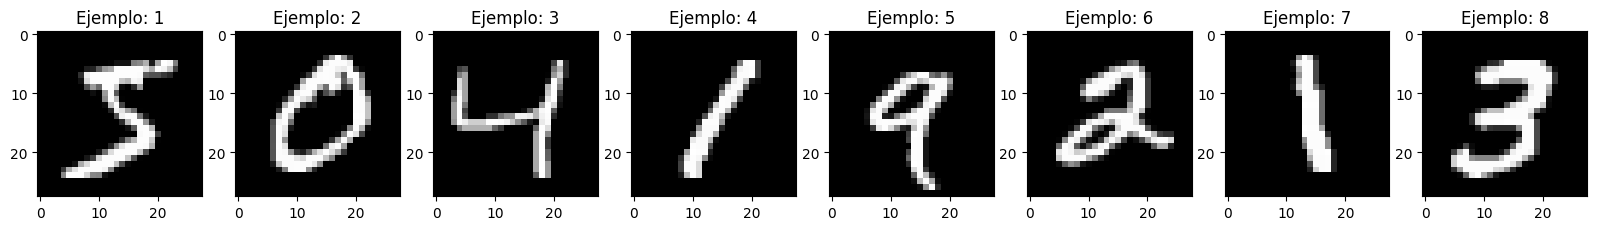

In [19]:
# Visualizacion de los primeros 8 ejemplos de nuestro conjunto de datos de entrenamiento
plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), X_train[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

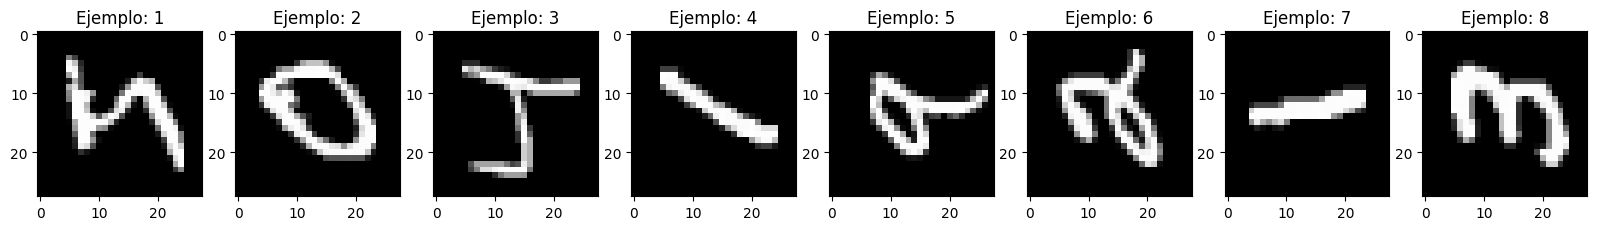

In [20]:
#Aqui aplicaremos una rotacion, este codigo va a servir para luego manejar otras opciones de filtrado
plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), X_train[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(np.rot90(digit), (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

### 1.3. División del conjunto de datos

Para la realización de una serie de pruebas adicionales vamos a dividir el conjunto de datos de prueba en dos subconjuntos, el conjunto de validación (X_val) y el conjunto de pruebas (X_test)

In [22]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [23]:
X_test.shape

(5000, 28, 28)

In [24]:
X_val.shape

(5000, 28, 28)

## 2. Definicion de la arquitectura de la Red Neuronal Artificial

Tal y como podéis observar en la definición de la Red Neuronal Artificial que se muestra a continuación, el bloque básico que utiliza Keras es la **layer** o capa. La red Neuronal estará formada por diferentes capas que a su vez contendrán un conjunto de neuronas que se corresponden con el primer parámetro que se le proporciona.

In [25]:
from tensorflow.keras import models
from tensorflow.keras import layers

Definimos una Red Neuronal Artificial formada por 3 capas:
* La primera capa estará formada por 300 neuronas
* La segunda capa estará formada por 100 neuronas
* La última capa estará formada por 10 neuronas

In [26]:
network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

Una vez hemos definido la arquitectura de la Red Neuronal Artificial podemos visualizarla junto con el número total de parámetros utilizando el método *summary()*

In [27]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### 2.2. Acceso a los elementos definidos de la RNA

In [28]:
network.layers

En este caso vamos a acceder a los parámetros del modelo que componen las neuronas de la primera hidden layer

In [29]:
hidden1 = network.layers[1]

In [30]:
weights, biases = hidden1.get_weights()

Como puede observarse en las siguientes celdas, Keras automáticamente inicializa el valor de los parámetros de manera aleatoria y los bias term con el valor 0

In [31]:
weights

array([[-0.06462473, -0.03678103, -0.05885705, ...,  0.10244224,
        -0.04239511, -0.04327697],
       [-0.11759978,  0.04278205, -0.00432817, ...,  0.10272329,
        -0.12132359,  0.07519913],
       [-0.00834764, -0.01965152, -0.04460715, ...,  0.05706092,
        -0.08598612, -0.04181018],
       ...,
       [ 0.03278866,  0.00497992,  0.12151181, ..., -0.07445441,
        -0.05204648,  0.03591537],
       [ 0.00541348,  0.00486939,  0.02845465, ..., -0.08465101,
         0.11356138, -0.11227059],
       [-0.0514084 ,  0.00808825,  0.10432989, ...,  0.00825355,
        -0.09257524, -0.12078175]], dtype=float32)

In [32]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## 3. Configuracion de la Red Neuronal Artificial

Para que la Red Neuronal Artificial funcione adecuadamente va a requerir tres componentes adicionales que se seleccionan durante el proceso de compilación:
1. **La función de error**: Se utiliza en el proceso de optimización de los parámetros del modelo para medir el error  producido al modificar el valor de los parámetros del modelo en una dirección determinada
2. **La función de optimización**: Se corresponde con la función encargada de actualizar el valor de los parámetros del modelo en una dirección determinada en función del resultado de la función de error
3. **Metricas para monitorizar el proceso de entrenamiento**: Es interesante utilizar un conjunto de métricas durante el proceso de entrenamiento de la Red Neuronal Artificial de manera que podamos saber en cada iteración si el valor de los parámetros del modelo es adecuado o se están produciendo problemas como *overfitting*

### Categorical crossentropy

https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy

In [33]:
network.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy', 'Precision'])

## 4. Preparacion del conjunto de datos

Debido a la forma en la que hemos definido la arquitectura de nuestra Red Neuronal Artificial y los parámetros de compilación, vamos a requerir realizar algunas transformaciones sobre nuestro conjunto de datos

### 4.1. Preparación de las características de entrada

In [34]:
X_train_prep = X_train.reshape((60000, 28*28))
X_train_prep = X_train_prep.astype('float32') / 255

X_test_prep = X_test.reshape((5000, 28*28))
X_test_prep = X_test_prep.astype('float32') / 255

X_val_prep = X_val.reshape((5000, 28*28))
X_val_prep = X_val_prep.astype('float32') / 255

In [35]:
X_train.shape

(60000, 28, 28)

In [36]:
X_train_prep.shape

(60000, 784)

In [37]:
#Para manejar los colores entre rangos de 0 y 1
print(X_train_prep[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

### 4.2. Preparación de las características de salida (etiquetas)

In [38]:
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)
y_val_prep = to_categorical(y_val)

In [39]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [40]:
#Notar que ahora cada valor de las etiquetas se representa como un array de valores por lo que el numero 5 es [0,0,0,0,0,1,0,0,0,0]
y_train_prep

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## 5. Entrenamiento de la Red Neuronal Artificial

En este punto ya estamos listos para entrenar nuestra Red Neuronal Artificial invocando el método *fit()*. Una de las capacidades que nos proporciona Keras es la de integrar el proceso de validación en el propio proceso de entrenamiento, para ello, junto con el subconjunto de datos de entrenamiento, debemos proporcionarle a este método el subconjunto de validación.

In [41]:
history = network.fit(X_train_prep,
                      y_train_prep,
                      epochs=10,
                      validation_data=(X_val_prep, y_val_prep))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5825 - accuracy: 0.8486 - precision: 0.9408 - val_loss: 0.3079 - val_accuracy: 0.9160 - val_precision: 0.9436
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2736 - accuracy: 0.9215 - precision: 0.9443 - val_loss: 0.2408 - val_accuracy: 0.9332 - val_precision: 0.9508
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2228 - accuracy: 0.9354 - precision: 0.9531 - val_loss: 0.2076 - val_accuracy: 0.9404 - val_precision: 0.9544
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1893 - accuracy: 0.9460 - precision: 0.9595 - val_loss: 0.1775 - val_accuracy: 0.9516 - val_precision: 0.9623
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1650 - accuracy: 0.9532 - precision: 0.9653 - val_loss: 0.1588 - val_accuracy: 0.9536 - val_precision: 0.9635
Epoch 6/10
1875/1875 [==============================] - 7s 4

En la variable ***history*** se almacenan varios valores importantes:
* El valor de los parámetros del modelo después del entrenamiento
* La lista de *epochs* llevados a cabo
* Un diccionario con el error producido en cada *epoch* en el conjunto de datos de entreanamiento y validación

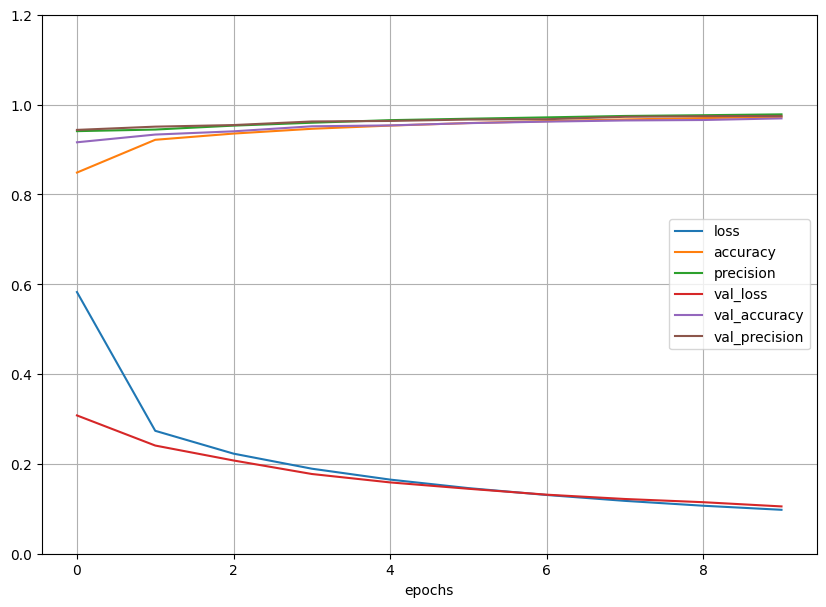

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

Debido a que en la gráfica anterior se observa que el error en el conjunto de datos y de validación sigue disminuyendo, podemos continuar entrenando el algoritmo invocando de nuevo el método *fit()*. Keras continuará el entrenamiento en el punto en el que lo dejó.

## 6. Validación con el conjunto de datos de pruebas

In [44]:
test_loss, test_acc, test_prec = network.evaluate(X_test_prep, y_test_prep)


157/157 [==============================] - 0s 2ms/step - loss: 0.1037 - accuracy: 0.9688 - precision: 0.9733


In [45]:
print('test_acc:', test_acc)
print('test_prec:', test_prec)

test_acc: 0.9688000082969666
test_prec: 0.973344087600708


In [46]:
#Que pasa si a pesar de que entrenamos con el dataset sin rotar, nos ponemos a rotar los datos de test

roated_test = np.array([np.rot90(image) for image in X_test])


print(roated_test.shape)
print(X_test.shape)

roated_test_prep = roated_test.reshape((5000, 28*28))
roated_test_prep = roated_test_prep.astype('float32') / 255

test_loss, test_acc, test_prec = network.evaluate(roated_test_prep, y_test_prep)

print('rotated test_acc:', test_acc)
print('rotated test_prec:', test_prec)

(5000, 28, 28)
(5000, 28, 28)
157/157 [==============================] - 0s 3ms/step - loss: 5.6688 - accuracy: 0.1388 - precision: 0.1442
rotated test_acc: 0.1387999951839447
rotated test_prec: 0.14420218765735626


## 7. Predicción de nuevos ejemplos

In [47]:
# Suponemos que X_new es un nuevo ejemplo que el algoritmo no ha visto nunca
X_new = X_test[34]

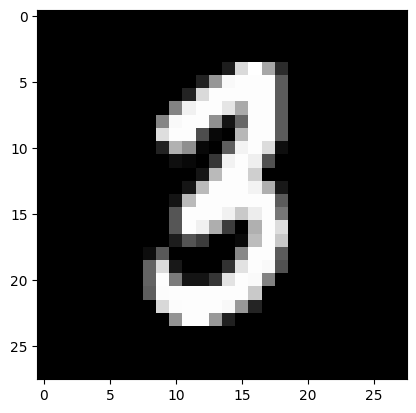

In [48]:
# Representación gráfica del nuevo ejemplo que queremos predecir
plt.imshow(np.reshape(X_new, (28,28)), cmap=plt.cm.gray)
plt.show()

In [49]:
# Preprocesamos la nueva imagen que queremos predecir
X_new_prep = X_new.reshape((1, 28*28))
X_new_prep = X_new_prep.astype('float32') / 255

In [50]:
# Relizamos la prediccion
y_proba = network.predict(X_new_prep)

1/1 [==============================] - 1s 965ms/step


In [112]:
y_proba

array([[2.1787721e-06, 2.3290033e-06, 3.4112623e-04, 4.9242761e-05,
        1.2919406e-07, 1.0931784e-05, 3.0732381e-06, 1.6695267e-10,
        9.9959069e-01, 3.5945709e-07]], dtype=float32)

In [113]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [114]:
# Realizamos la prediccion obteniendo una clase en lugar de una probabilidad
np.argmax(network.predict(X_new_prep), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([8])

Es importante saber que el método tradicional *predict_classes* va a ser deprecado proximamente

## 8. Guardar el modelo en disco

Con Keras generamos la arquitectura de la red neuronal, la entrenamos y después la evaluamos. Existen diferentes alternativas a la hora de exportar el modelo entrenado (https://keras.io/getting_started/faq/#what-are-my-options-for-saving-models), en este caso se expone una de las más utilizadas.

De la forma que se indica a continuación, vamos a exportar en un fichero los siguientes componentes de la red neuronal:
* La arquitectura del modelo
* Los parámetros del modelo
* Los hiperparámetros del modelo
* Las métricas

In [115]:
# Guardamos el modelo en disco
#network.save("modelo_mnist.h5")

Una vez ejecutada la celda anterior, generará un fichero *modelo_mnist* que puede utilizarse para transportarlo a otro sistema y predecir con nuevos ejemplos. La forma en la que puedes importar este fichero para predecir con nuevos ejemplos es la siguiente:

In [116]:
# @title
# Importamos las librerias necesarias
#from tensorflow.keras.models import load_model

# Cargamos el modelo de disco
#mnist_model = load_model("modelo_mnist.h5")

# Realizamos una nueva prediccion
#y_pred = np.argmax(mnist_model.predict(X_new_prep), axis=-1)

In [117]:
#y_pred